<h3 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h3>
<h3 style="text-align:center;">FACULTAD DE INGENIERÍA EN SISTEMAS</h3>
<h3 style="text-align:center;">METODOS NUMERICOS ICCD412 </h3>

*Sebastián Pazmiño*

*Tarea N 3*

*GR1CC*


 ### *Indicaciones*
* *-Para cada ejercicio escriba el pseudocódigo de su algoritmo en un editor de texto de su preferencia (latex, word, etc).*

* *-Subir el código de cada ejercicio en un repositorio público en Github.* 



*1. Utilice aritmética de corte de tres dígitos para calcular las siguientes sumas. Para cada parte, ¿qué método es más preciso y por qué?*


a. $\sum_{i=1}^{10} \left ( \frac{1}{i^2} \right)$ primero por: $\frac{1}{1}+ \frac{1}{4} + \cdots + \frac{1}{100}$ Y luego por: $\frac{1}{100} + \frac{1}{81} + \cdots + \frac{1}{1}$

b.  $\sum_{i=1}^{10} \left( \frac{1}{i^3} \right)$ primero por: $\frac{1}{1} + \frac{1}{8} + \frac{1}{27} + \cdots + \frac{1}{1000}$ Y luego por: $\frac{1}{1000} + \frac{1}{729} + \cdots + \frac{1}{1}$


In [1]:
# primer metodo "A"

def corte_3_decimales(x):
    return int(x * 1000) / 1000  
suma = 0.0

for i in range(1, 11):
    
    suma += corte_3_decimales(1 / i**2)
    print(f"{i} = {corte_3_decimales(1 / i**2)}")
    

print(f"\nSuma total (con corte a 3 decimales): {suma}")
print("")




1 = 1.0
2 = 0.25
3 = 0.111
4 = 0.062
5 = 0.04
6 = 0.027
7 = 0.02
8 = 0.015
9 = 0.012
10 = 0.01

Suma total (con corte a 3 decimales): 1.547



In [2]:
# Segundo metodo "B"

def corte_3_decimales(x):
    return int(x * 1000) / 1000  
suma = 0.0

for i in range(1, 11):
    suma += corte_3_decimales(1 / i**3)
    print(f"{i} = {corte_3_decimales(1 / i**3)}")

print(f"\nSuma total (con corte a 3 decimales):{suma}")

1 = 1.0
2 = 0.125
3 = 0.037
4 = 0.015
5 = 0.008
6 = 0.004
7 = 0.002
8 = 0.001
9 = 0.001
10 = 0.001

Suma total (con corte a 3 decimales):1.1939999999999995


*Se evaluaron ambos métodos utilizando únicamente 3 dígitos significativos en los cálculos. En el proceso de la suma final se produjo una pérdida significativa en la parte decimal.*

*El método "A" demostró mayor precisión en la sumatoria en comparación con el método "B". Esta diferencia se debe a que en el segundo método se acumula una pérdida más severa de cifras significativas como consecuencia del truncamiento a 3 dígitos en múltiples etapas del cálculo.*

*2. La serie de Maclaurin para la función arcotangente converge para −1 < 𝑥 ≤ 1 y está dada por*

$$arctan x = \lim_{n \to \infty} P_n(x) = lim_{n \to \infty} \sum_{i=1}^{n} (-1)^{i+1} \frac{x^{2i-1}}{2i-1}$$

*a. Utilice el hecho de que tan 𝜋⁄4 = 1 para determinar el número n de términos de la serie que se necesita sumar para garantizar que |4𝑃𝑛(1) − 𝜋| < 10−3*

*b. El lenguaje de programación C++ requiere que el valor de 𝜋 se encuentre dentro de $10^{10}$. ¿Cuántos términos de la serie se necesitarían sumar para obtener este grado de precisión?*

In [3]:
def aproximar_pi_con_error(tolerancia):
    suma = 0.0
    i = 1
    while True:
        termino = (-1)**(i + 1) / (2 * i - 1)
        suma += termino
        error_estimado = 4 * abs(termino)  # maximo error posible 
        if error_estimado < tolerancia:
            break
        i += 1
    pi_aproximado = 4 * suma
    return pi_aproximado, i

#a
pi_1, n_1 = aproximar_pi_con_error(1e-3)
print(f"(a): pi ≈ {pi_1}, con {n_1} términos")

(a): pi ≈ 3.1420924036835256, con 2001 términos


*3. Otra fórmula para calcular 𝜋 se puede deducir a partir de la identidad $\frac{𝜋}{4} = 4 arctan \frac{1}{5} - arctan \frac{1}{239}  $. Determine el número de términos que se deben sumar para garantizar una aproximación 𝜋 dentro de $10^{-3}$.*

In [4]:
def calcular_terminos(error_maximo):
    n = 1
    while True:
        error_principal = 16 * (1/5)**(2*n + 1) / (2*n + 1)
        error_secundario = 4 * (1/239)**(2*n + 1) / (2*n + 1)
        error_total = error_principal + error_secundario
        if error_total < error_maximo:
            return n
        n += 1

error_objetivo = 1e-3
n_terminos = calcular_terminos(error_objetivo)
print(f"Numero de términos: {n_terminos}")

Numero de términos: 3


*4. Compare los siguientes tres algoritmos. ¿Cuándo es correcto el algoritmo de la parte 1a?*

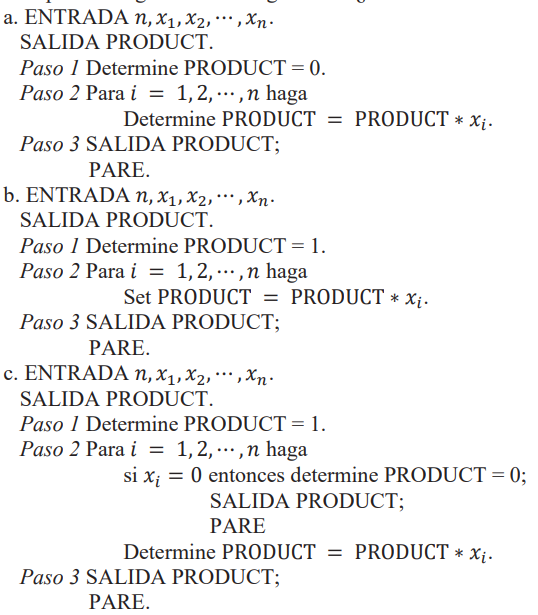|


*Los algoritmos más eficientes para calcular la sumatoria del ejercicio 1a son las opciones b y c. Entre estos, el algoritmo c tiende a ser más eficiente debido a su condición de entrada que optimiza el proceso. Por otro lado, el algoritmo b destaca por su simplicidad, ya que realiza la multiplicación de los n números de manera secuencial desde el principio hasta el final.*

*5.a. ¿Cuántas multiplicaciones y sumas se requieren para determinar una suma de la forma*

$\sum_{i=1}^{n} \sum_{j=1}^{n} a_i b_j$.




In [5]:
def contar_operaciones_suma_doble(n):
    total_sumas = 2 * n - 2
    total_multiplicaciones = 1
    
    return {
        "n": n,
        "multiplicaciones": total_multiplicaciones,
        "sumas": total_sumas
    }

n_caso_1 = 3
resultado_1 = contar_operaciones_suma_doble(n_caso_1)
print(f"Para n = {resultado_1['n']}:")
print(f"Multiplicaciones requeridas: {resultado_1['multiplicaciones']}")
print(f"Sumas requeridas: {resultado_1['sumas']}")

print("-" * 30)

n_caso_2 = 10
resultado_2 = contar_operaciones_suma_doble(n_caso_2)
print(f"Para n = {resultado_2['n']}:")
print(f"Multiplicaciones requeridas: {resultado_2['multiplicaciones']}")
print(f"Sumas requeridas: {resultado_2['sumas']}")

Para n = 3:
Multiplicaciones requeridas: 1
Sumas requeridas: 4
------------------------------
Para n = 10:
Multiplicaciones requeridas: 1
Sumas requeridas: 18


*b. Modifique la suma en la parte a) a un formato equivalente que reduzca el número de cálculos* 

In [6]:

import numpy as np

# Definir n
n = 10

# suma original 
sum_original = sum(1/i**2 for i in range(1, n+1))
print("suma original :", sum_original)

# suma inversa
sum_inversa = sum(1/i**2 for i in reversed(range(1, n+1)))
print("suma inversa:", sum_inversa)

# sumatoria para reduccion de calculos
i = np.arange(1, n+1)
a_i = 1 / i**2
b_j = np.ones(n)  # Simula la segunda sumatoria
sum_doble = np.sum(a_i * b_j)  # Equivalente a sum(a_i)
print("suma equivalente:", sum_doble)


suma original : 1.5497677311665408
suma inversa: 1.5497677311665408
suma equivalente: 1.5497677311665408


### Discusiones 
*1. Escriba un algoritmo para sumar la serie finita $\sum_{i=1}^{n} xi$  en orden inverso*

In [ ]:

# ALGORITMO: Suma en orden inverso de la serie ∑ x_i

# ENTRADA: n, x_1, x_2, ..., x_n
# SALIDA: suma_total

# Paso 1: Inicializar suma_total = 0
# Paso 2: Para i desde n hasta 1 (decrementa -1):
#            suma_total = suma_total + x_i
# Paso 3: Devolver suma_total
# FIN

*2.  Las ecuaciones (1.2) y (1.3) en la sección 1.2 proporcionan formas alternativas para las raíces* 

$𝑥_1 $ y $ 𝑥_2$  de

$ax^2 + bx +c = 0$. 

*Construya un algoritmo con entrada 𝑎, 𝑏, 𝑐 c y salida 𝑥1, 𝑥2 que calcule las raíces $𝑥_1 $ y $ 𝑥_2$  (que pueden ser iguales con conjugados complejos) mediante la mejor fórmula para cada raíz.*

In [ ]:

# ENTRADA: 𝑎, 𝑏, 𝑐 
# SALIDA: x_1 , x_2

# ENTRADA: a, b, c
# SALIDA: x1, x2

# Paso 1: Calcular discriminante D = b² - 4ac

# Paso 2: Si D ≥ 0:
#    Si b ≥ 0:
#        x1 = [2c] / [-b - √D]  # Fórmula (1.3) para raíz más pequeña
#        x2 = [-b - √D] / [2a]   # Fórmula (1.2) para raíz más grande
#    Sino:
#        x1 = [-b + √D] / [2a]   # Fórmula (1.2) para raíz más grande
#        x2 = [2c] / [-b + √D]   # Fórmula (1.3) para raíz más pequeña
# Sino (D < 0):
#    Calcular parte real = -b/(2a)
#    parte imaginaria = √|D|/(2a)
#    x1 = parte real + parte imaginaria*i
#    x2 = parte real - parte imaginaria*i
#FIN

*3. suponga que* 

$$ \frac{1-2x}{1-x+x^2} + \frac{2x-4x^3}{1-x^{2}+x^{3}} + \frac{4x^3-8x^7}{1-x^4+x^{8} }  + ... = \frac{1+2x}{1+x+x^{2}}  $$


para 𝑥 < 1 y si 𝑥 = 0.25. 
*Escriba y ejecute un algoritmo que determine el número de términos necesarios en el lado izquierdo de la ecuación de tal forma que el lado izquierdo difiera del lado derecho en menos de*

$10^{-6}$

In [8]:
x = 0.25
Diferencia = 1e-6

# Lado derecho
right_side = (1 + 2 * x) / (1 + x + x ** 2)

# Inicialización
sum_left = 0
n = 0

while True:
    numerator = 2**n * x**(2**n - 1) - 2**(n+1) * x**(2**(n+1) - 1)
    denominator = 1 - x**(2**n) + x**(2**(n+1))
    term = numerator / denominator
    sum_left += term

    if abs(sum_left - right_side) < Diferencia:
        break

    n += 1

print(f"necesitamos {n + 1} terminos para que la suma difiera  en menos de 1e-6")



necesitamos 4 terminos para que la suma difiera  en menos de 1e-6


**link al repositorio de git-hub**

https://github.com/Sebas-p2304/Metodos-Numericos